# Movie Recommendation System

In [1]:
# Libraries for data file processing 
import os

# libraries for special vizualization 
import wordcloud
from wordcloud import STOPWORDS
from wordcloud import WordCloud

# Essential librarires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Settings for visualization
sns.set_style(style='white') 
sns.set(rc={
    'figure.figsize':(12,7), 
    'axes.facecolor': 'white',
    'axes.grid': True, 'grid.color': '.9',
    'axes.linewidth': 1.0,
    'grid.linestyle': u'-'},font_scale=1.5)
custom_colors = ["#3498db", "#95a5a6","#34495e", "#2ecc71", "#e74c3c"]
sns.set_palette(custom_colors)

## Data Preprocessing

**Summary:**
These files contain 1,000,209 anonymous ratings of approximately 3,900 movies 
made by 6,040 MovieLens users who joined MovieLens in 2000.

In [3]:
# DAT file declaration - Ratings data 
rating_dat_file = 'ratings.dat'

# Read the Ratings File
ratings_data = pd.read_csv(os.path.join("dat_files", rating_dat_file), sep='::', engine='python', encoding='latin-1',
                    names=['user_id', 'movie_id', 'rating', 'timestamp'])

print("Loading.. ", len(ratings_data))

Loading..  1000209


In [4]:
# DAT file declaration - Movies data 
movies_dat_file = 'movies.dat'

# Read the Movies File
movies_data = pd.read_csv(os.path.join("dat_files", movies_dat_file), sep='::', engine='python', encoding='latin-1',
                    names=["movie_id", "title", "genres"])

print("Loading.. ", len(movies_data))

Loading..  3883


In [5]:
# DAT file declaration - Users data 
users_dat_file = 'users.dat'

# Read the Users File
users_data = pd.read_csv(os.path.join("dat_files", users_dat_file), sep='::', engine='python', encoding='latin-1',
                    names=["user_id", "gender", "age", "occupation", "zipcode"])

print("Loading.. ", len(users_data))
print()
# Displaying the dataset
print("Current Users dataframe that is numerically encoded: ")
users_data.head()

Loading..  6040

Current Users dataframe that is numerically encoded: 


,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


It can be seen from the above users dataframe that the occupation feature is numericaly encoded and the age is categorized as mentioned below:

- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"
- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"

In [6]:
# Categorizing the age and occupation columns based on the information provided above, dictinary data structure is used 
# for key value pairs
age_category = { 1: "Under 18", 
                18: "18-24", 
                25: "25-34", 
                35: "35-44", 
                45: "45-49", 
                50: "50-55", 
                56: "56+"}

occupation_category = {0: "other or not specified",
                       1: "academic/educator",
                       2: "artist", 
                       3: "clerical/admin",
                       4: "college/grad student", 
                       5: "customer service", 
                       6: "doctor/health care",
                       7: "executive/managerial", 
                       8: "farmer", 
                       9: "homemaker", 
                       10: "K-12 student", 
                       11: "lawyer",
                       12: "programmer", 
                       13: "retired", 
                       14: "sales/marketing", 
                       15: "scientist", 
                       16: "self-employed",
                       17: "technician/engineer", 
                       18: "tradesman/craftsman", 
                       19: "unemployed", 
                       20: "writer"}

# Creating new cloumns with updated values/category info using lambda function on each datapoint for both features
users_data['age_group'] = users_data['age'].apply(lambda x: age_category[x])
users_data['occupation'] = users_data['occupation'].apply(lambda x: occupation_category[x])

# Resultant dataframe 
print("Processed dataframe: ")
users_data.head()

Processed dataframe: 


,user_id,gender,age,occupation,zipcode,age_group
0,1,F,1,K-12 student,48067,Under 18
1,2,M,56,self-employed,70072,56+
2,3,M,25,scientist,55117,25-34
3,4,M,45,executive/managerial,02460,45-49
4,5,M,25,writer,55455,25-34


#### Saving data into respective csv files

In [7]:
# Creating a csv file to save rating.csv
ratings_data.to_csv("ratings_data.csv", sep='\t', header=True, encoding='latin-1', 
               columns=['user_id', 'movie_id', 'rating', 'timestamp'])

print("rating_data.csv saved in directory..")

rating_data.csv saved in directory..


In [8]:
# Creating a csv file to save movies.csv
movies_data.to_csv("movies_data.csv", sep='\t', header=True, encoding='latin-1', 
               columns=["movie_id", "title", "genres"])

print("movies_data.csv saved in directory..")

movies_data.csv saved in directory..


In [9]:
# Creating a csv file to save users.csv
users_data.to_csv("users_data.csv", sep='\t', header=True, encoding='latin-1', 
               columns=["user_id", "gender", "age", "occupation", "zipcode"])

print("users_data.csv saved in directory..")

users_data.csv saved in directory..


## Exploratory Data Analysis
- Exploratory data analysis is a way to better understand the data which helps in further data preprocessing. And data visualization is a key tep involved in this process of analysis.

In [10]:
# Above datasets in dictionary  
data_list = {"Movies dataset: ":movies_data,"Ratings dataset: ": ratings_data,"Users dataset: ": users_data}

# Iterating over the abpve dictionary for getting the data name and dataset pairs for displaying 
for key, value in data_list.items():
    print(key)
    print(value.head())
    print()
    print(value.info())
    print("*******************************************************************************************************************")

Movies dataset: 
   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
None
*******************************************************************************************************************
Ratings dataset: 
   user_id  movie_id  rating

**Observation**: From the above dataframes we can see that we do not have null values in any, however we do have some features like timestamp and age in ratings and users dataset respectively which can be dropped. Year and genere info can be pulled from the features in movies dataset where the generes for each movie is delimited by pipes. Apprently the pincode information that is available in users dataset seems interesting to play with.

### Data cleaning

In [11]:
# Merging datasets as a single dataframe
lens_data = pd.merge(pd.merge(ratings_data,users_data), movies_data)

# Pulling year information and adding as a new column 
movie_release_year_string = lens_data["title"].apply(lambda x: x.split(" ")[-1][1:-1])
movie_release_year = movie_release_year_string.apply(lambda x: int(x))

lens_data["movie_release_year"] = movie_release_year

# Cleaning title feature by removing the year String
lens_data["movie_title"] = lens_data["title"].apply(lambda x: x.split("(")[0])

# Dropping the features that are not required
lens_data.drop(["timestamp","age","title"],axis=1,inplace=True)

# Re-ordering the columns
lens_data = lens_data[["movie_id", "movie_title", "movie_release_year",
           "genres","rating", "user_id", "gender",
           "age_group","occupation", "zipcode"]]

# Resultant dataframe
lens_data.tail()

,movie_id,movie_title,movie_release_year,genres,rating,user_id,gender,age_group,occupation,zipcode
1000204,2198,Modulations,1998,Documentary,5,5949,M,18-24,technician/engineer,47901
1000205,2703,Broken Vessels,1998,Drama,3,5675,M,35-44,sales/marketing,30030
1000206,2845,White Boys,1999,Drama,1,5780,M,18-24,technician/engineer,92886
1000207,3607,One Little Indian,1973,Comedy|Drama|Western,5,5851,F,18-24,writer,55410
1000208,2909,"Five Wives, Three Secretaries and Me",1998,Documentary,4,5938,M,25-34,academic/educator,35401


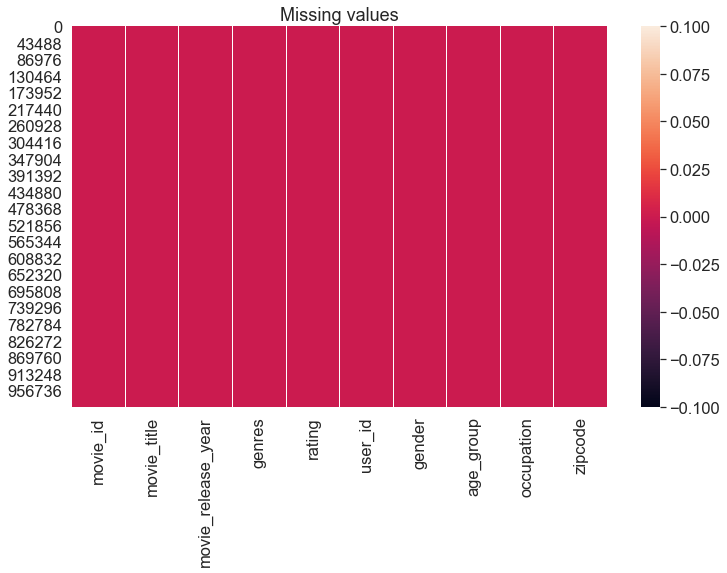

In [12]:
# Checking for missing data
sns.heatmap(lens_data.isnull()).set_title("Missing values")
plt.show()

**Observation:** No missing values found in the above heatmap

As the first step, we wanted to list down the question that came to our mind after looking at the processed dataframe. This helped us get a clear understanding of the observations and helped us formulate the problem statement.

## Questions listed after brainstorming 

In [13]:
# Do science fiction movies tend to be rated more highly than other movie genres?
# Which genres were more dominant in each decade of the range available in the dataset?
# Is there a correlation between the year of release of a movie and the genre?a
# What are the top 10 most rated movies?
# What are the most popular Movie Genres among Males and Females?
# What are the Max/Min number of Movies rated by One user?
# What Genre is associated with the most Movies?
# What are the Distribution of Ratings per Genre?
# most common occupation amongst the users
# What’s the Age Distribution by Gender?
# Movies are rated on a 1-5 scale. What is the average movie rating? 
# How many of the users are artists or belong to or closely related to the film industry?
# What is the zip code of the user who rated the most movies?
# What interesting stories using the data in movielens dataset you would like to tell a studio executive/movie producer? genres

### Utilities

In [14]:
# Listing out the unique genres available in the dataset
splitted_genre_list = lens_data.genres.str.split('|').tolist()
unique_genre_list = pd.DataFrame(splitted_genre_list).stack().unique()
final_genre_list = unique_genre_list.tolist()

# Resultant list of movie genres that are unique 
print("Final list of genres after cleaning and extraction from the database: ")
print()
print(final_genre_list)

Final list of genres after cleaning and extraction from the database: 

['Drama', 'Animation', "Children's", 'Musical', 'Romance', 'Comedy', 'Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'War', 'Thriller', 'Crime', 'Mystery', 'Western', 'Horror', 'Film-Noir', 'Documentary']


In [15]:
# 2nd dataframe for containing the unique genre columns in boolean data type
lens_data2 = lens_data

# Above processed dataframe is further processed by joining columns that are of boolean data
# type and where the genres column is dropped
lens_data2 = lens_data.join(lens_data2["genres"].str.get_dummies().astype(bool))
lens_data2.drop('genres', inplace=True, axis=1)

# Resultant 2nd dataframe that has it's ouw purpose 
lens_data2.head(2)

,movie_id,movie_title,movie_release_year,rating,user_id,gender,age_group,occupation,zipcode,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1193,One Flew Over the Cuckoo's Nest,1975,5,1,F,Under 18,K-12 student,48067,False,...,False,False,False,False,False,False,False,False,False,False
1,1193,One Flew Over the Cuckoo's Nest,1975,5,2,M,56+,self-employed,70072,False,...,False,False,False,False,False,False,False,False,False,False


# Data Visualization

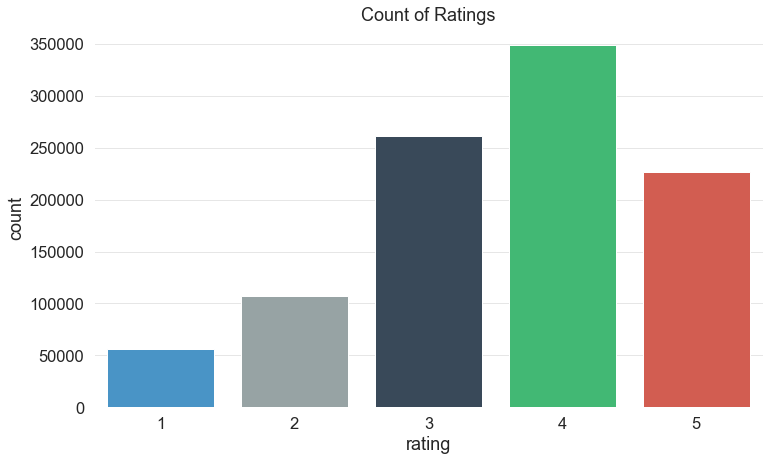

,Percentage breakup of Ratings
Rating 1,5.616
Rating 2,10.753
Rating 3,26.114
Rating 4,34.890


In [16]:
# Histogram of ratings data
sns.countplot(x=lens_data.rating, data=lens_data)
plt.title("Count of Ratings")

# To display the plot
plt.show()

# Percentage distribuion of ratings data
ratings_value_counts = round(lens_data["rating"].value_counts(normalize = True)*100,3)
rating_4 = ratings_value_counts[4]
rating_3 = ratings_value_counts[3]
rating_2 = ratings_value_counts[2]
rating_1 = ratings_value_counts[1]

pd.DataFrame({"Percentage breakup of Ratings":{"Rating 4": rating_4,
                         "Rating 3": rating_3,
                         "Rating 2": rating_2,
                         "Rating 1": rating_1,}})

**Observation:** We can see that the highest rating provided by the public is 4 and that is the most popular rating of all other ratings which is almost 35% of total count of ratings obtained from the public

## Gender Analysis

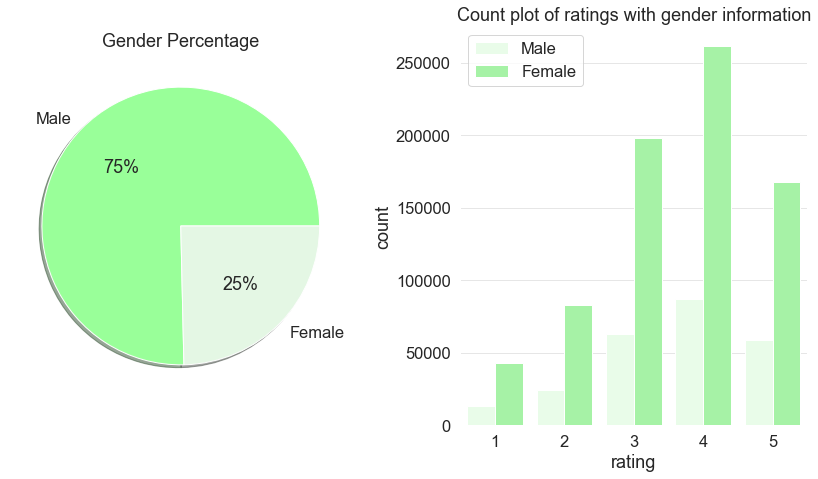

In [17]:
# Pie chart for different classes 
plt.subplot(1,2,1)
classes = ['Male', 'Female']
colors_list = ['#99ff99','#e4f7e4']
plt.pie(lens_data["gender"].value_counts(), labels = classes, autopct='%.0f%%', shadow=True, colors=colors_list)
plt.title("Gender Percentage")

# Count plot of ratings based on gender
plt.subplot(1,2,2)
classes = ['Male', 'Female']
colors = ["blue","red"]
sns.countplot(x="rating", data=lens_data, hue="gender",color="#99ff99")
plt.title("Count plot of ratings with gender information")
plt.legend(classes)

# To show the plot
plt.tight_layout() 
plt.show()

**Observation:** Above pie chart confirmes that only 25% of the ratings data comes from the females which makes us feel that the sampling is not random enough. From the available data it is seen that 4 is the most common rating given by males and females. Since more males rated these movies, the ratings data could be biased. 

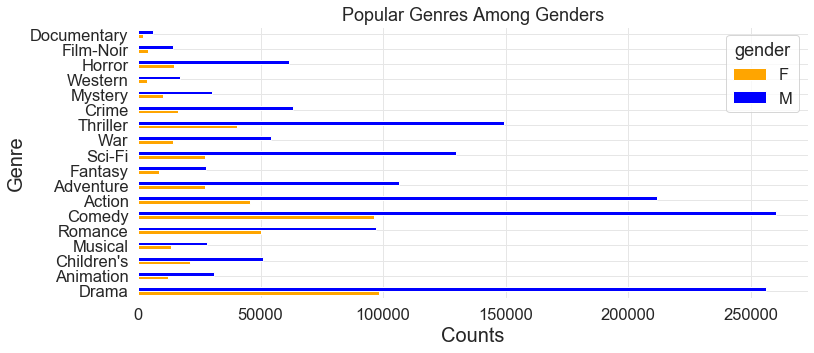

In [18]:
# 
lens_data2[final_genre_list + ["gender"]].groupby("gender").sum().T.plot(kind="barh", figsize=(12,5), color=["orange", "blue"])

# Settings for data viz. 
plt.xlabel("Counts",fontsize=20)
plt.ylabel("Genre", fontsize=20)
plt.title("Popular Genres Among Genders")

# To show the plot
plt.show()

**Observation**: The ratio of interests shown by male and female on different genres are found to be the same from the above horizontal bar graph. The most popular genre is Comedy and the second being action 

## Age Analysis

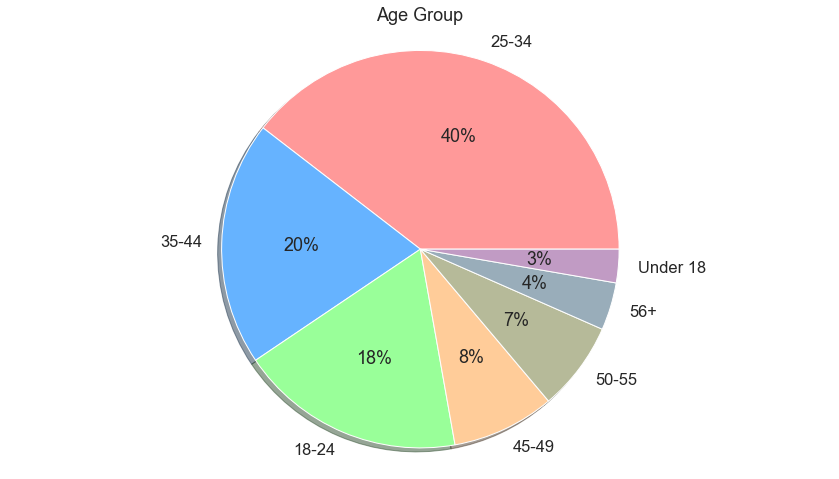

In [19]:
# Visualizing overall age
classes = ['25-34', '35-44', '18-24', '45-49', '50-55', '56+', 'Under 18']
colors_list = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#b6ba99','#99adba','#c19bc4']
fig1, ax1 = plt.subplots()
ax1.pie(lens_data["age_group"].value_counts(), autopct='%.0f%%',colors=colors_list,labels=classes, shadow=True)
plt.title("Age Group")

# To show the plot
ax1.axis('equal')
plt.tight_layout() 
plt.show()

**Observation:** Pie chart that shows the percentage of each age group present in the dataset, it is evident that people who are aged around 30 years seem to watch a lot of movies and have given provided us with more ratings 

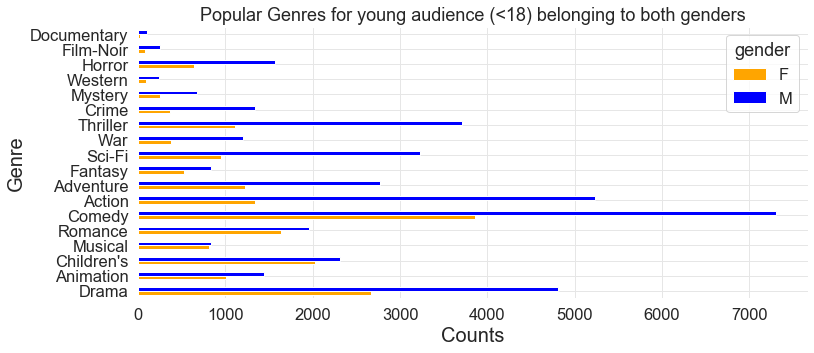

In [20]:
# 
lens_data2[lens_data2["age_group"] == "Under 18"][final_genre_list + ["gender"]].groupby("gender").sum().T.plot(kind="barh", figsize=(12, 5), color=["orange", "blue"])

# Settings for data viz.
plt.xlabel("Counts",fontsize=20)
plt.ylabel("Genre", fontsize=20)
plt.title("Popular Genres for young audience (<18) belonging to both genders")

# To show the plot
plt.show()

In [21]:
#lens_data['rating'].plot(kind='box', subplots=True)

## Genre Analysis

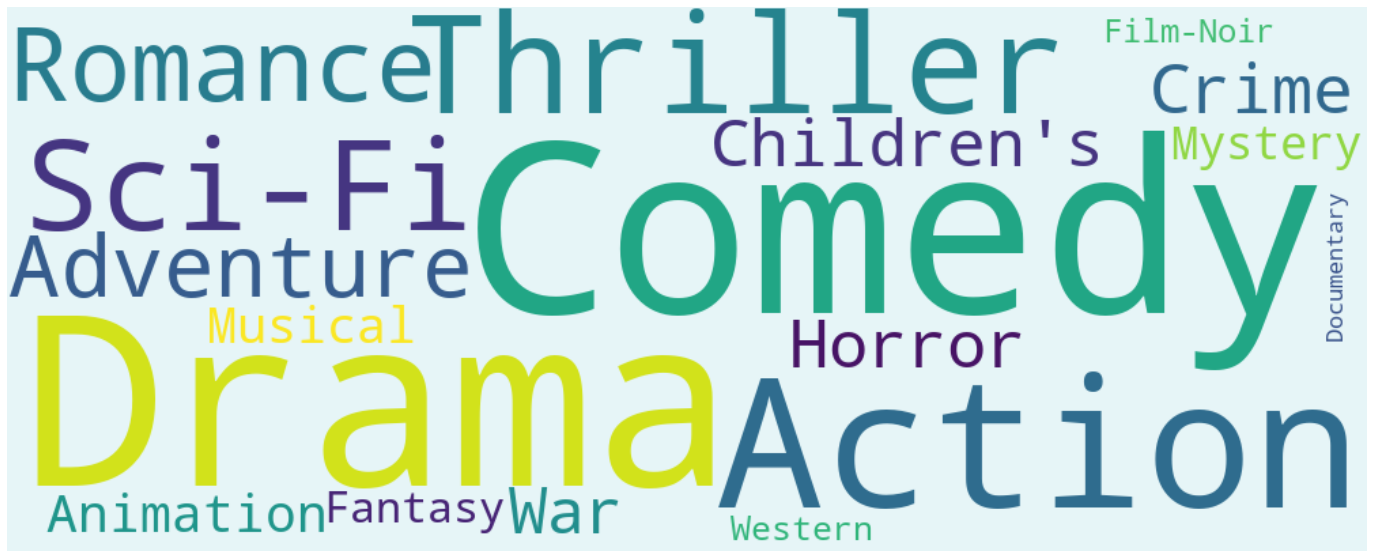

In [27]:
# Function to count the number of movies in each genres
def count_word(dataframe, target_coloumn, set_of_genere):
    keyword_count = dict()
    for s in set_of_genere: keyword_count[s] = 0
    for set_of_genere_keywords in dataframe[target_coloumn].str.split('|'):
        if type(set_of_genere_keywords) == float and pd.isnull(set_of_genere_keywords): continue
        for s in set_of_genere_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
                
    # Convert the dictionary into a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count


# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:30]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# Create the wordcloud with the specified settings
genre_wordcloud = WordCloud(width=1000, height=400, background_color='#e6f5f7', max_words=1000)
#
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(25,10))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

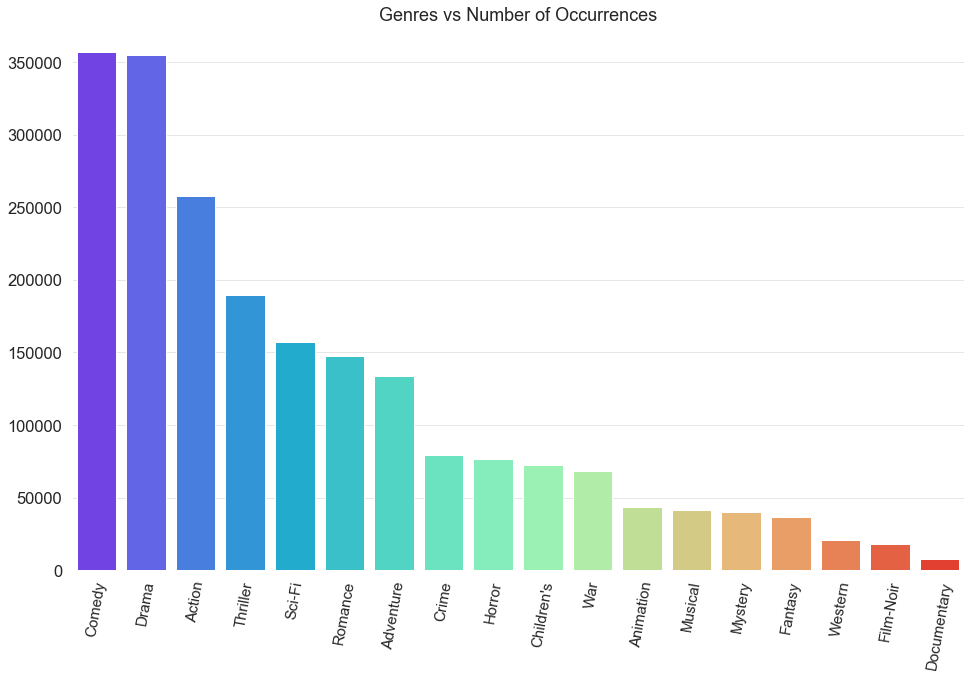

In [23]:
# Bargraph visualization of same data for accurate measures 

# Splitting the genere to have a set of it
genere_set = set()
for each_entry in lens_data['genres'].str.split('|').values:
     genere_set = genere_set.union(set(each_entry))

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(lens_data, "genres", genere_set)

# Adding respective values into the axes after unpacking the key value pairs from the dictionary created
x_axis=[]
y_axis=[]
for genere,count in keyword_occurences:
    x_axis.append(genere)
    y_axis.append(count)
    
# Data viz. settings 
plt.figure(1, figsize=(16,10))
plt.xticks(rotation=80, fontsize = 15)
sns.barplot(x_axis,y_axis, palette="rainbow")
plt.title("Genres vs Number of Occurrences")
plt.show()

## Ratings Analysis

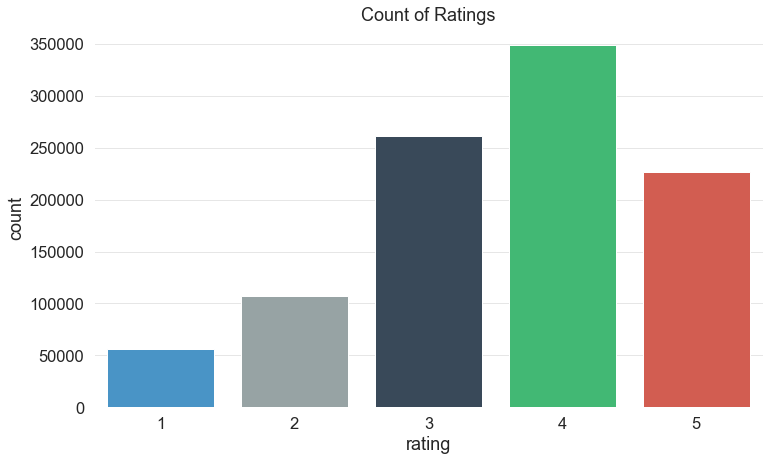

,Percentage breakup of Ratings
Rating 1,5.616
Rating 2,10.753
Rating 3,26.114
Rating 4,34.890


In [24]:
# Histogram of ratings data
sns.countplot(x=lens_data.rating, data=lens_data)
plt.title("Count of Ratings")

# To display the plot
plt.show()

# Percentage distribuion of ratings data
ratings_value_counts = round(lens_data["rating"].value_counts(normalize = True)*100,3)
rating_4 = ratings_value_counts[4]
rating_3 = ratings_value_counts[3]
rating_2 = ratings_value_counts[2]
rating_1 = ratings_value_counts[1]

pd.DataFrame({"Percentage breakup of Ratings":{"Rating 4": rating_4,
                         "Rating 3": rating_3,
                         "Rating 2": rating_2,
                         "Rating 1": rating_1,}})

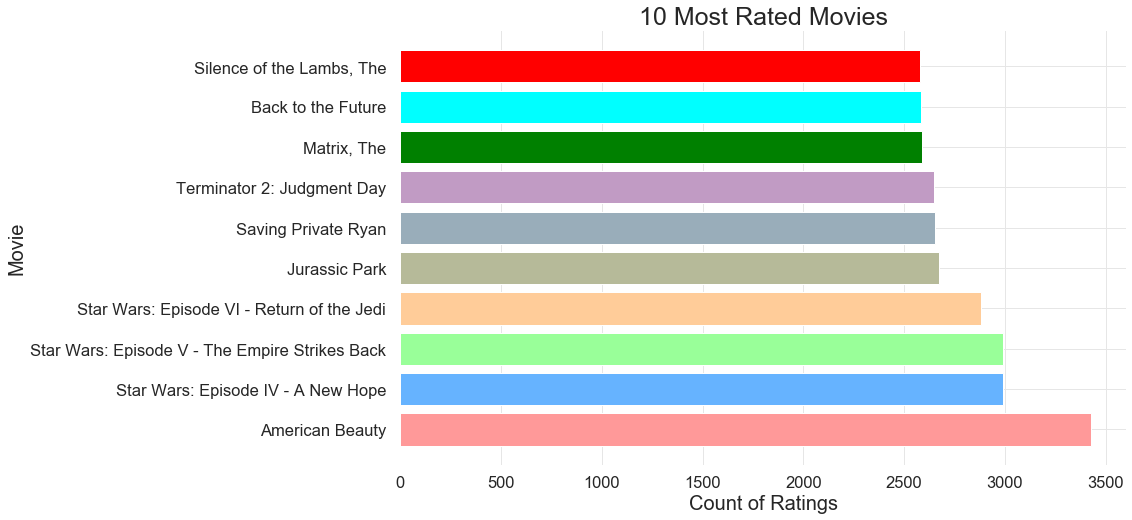

In [25]:
# Return number of rows associated to each title
top_ten_movies = lens_data.groupby("movie_title").size().sort_values(ascending=False)[:10]

# Plot the counts
plt.figure(figsize=(13, 8))

plt.barh(y= top_ten_movies.index,
         width= top_ten_movies.values,
         color=['#ff9999','#66b3ff','#99ff99','#ffcc99','#b6ba99','#99adba','#c19bc4','green','cyan', 'red'])
plt.title("10 Most Rated Movies", fontsize=25)
plt.ylabel("Movie", fontsize=20)
plt.xlabel("Count of Ratings", fontsize=20)
plt.show()

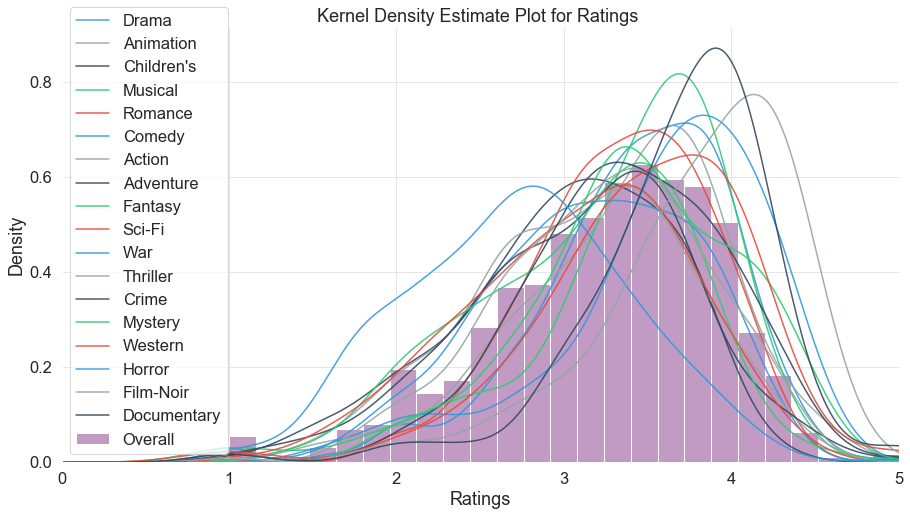

In [26]:
# Dataframe with the unique generes extracted already 
genres_unique = pd.DataFrame(unique_genre_list, columns=['genre'])

# Dataframe to contain the mean ratings and the movie ID
temp = lens_data[['movie_id','rating']].groupby('movie_id').mean()

# Histogram of all ratings, density is set to True to get the Kernal Density
temp.hist(bins=25, grid=True, color = "#c19bc4", label ='Overall', figsize=(15,8), density = True)


# KDE plot per genre
for genre in genres_unique.genre:
    temp = lens_data2[lens_data2[genre] == True][['movie_id','rating']].groupby('movie_id').mean()
    temp.rating.plot(grid=True, alpha=0.9, kind='kde', label=genre)

# Data viz. settings
plt.legend()
plt.xlim(0,5)
plt.xlabel('Ratings')
plt.title('Kernel Density Estimate Plot for Ratings ')

# To show the plot
plt.show()

**Observation**: There is a suddent increase after the year 1990 and a drop in the year 2000, REASON TO BE explored

## Occupation Analysis

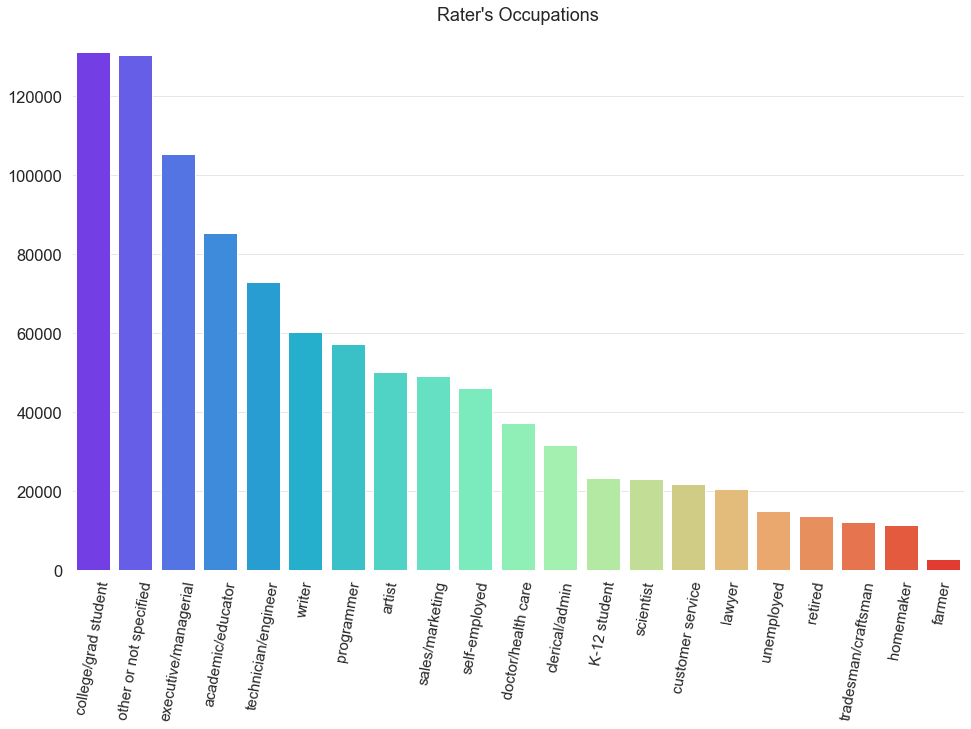

In [28]:
# Saving name of the occupation and it's respective counts into the variables
occupation_name = lens_data["occupation"].value_counts().index
countof_occuation_name = lens_data["occupation"].value_counts().values

# Data viz. settings 
plt.figure(1, figsize=(16,10))
plt.xticks(rotation=80, fontsize = 15)
sns.barplot(occupation_name,countof_occuation_name, palette="rainbow")
plt.title("Rater's Occupations")

# To show the plot
plt.show()

**Obseravtion**: As expected the main group that contributes for the ratings data, belongs to the student community. 

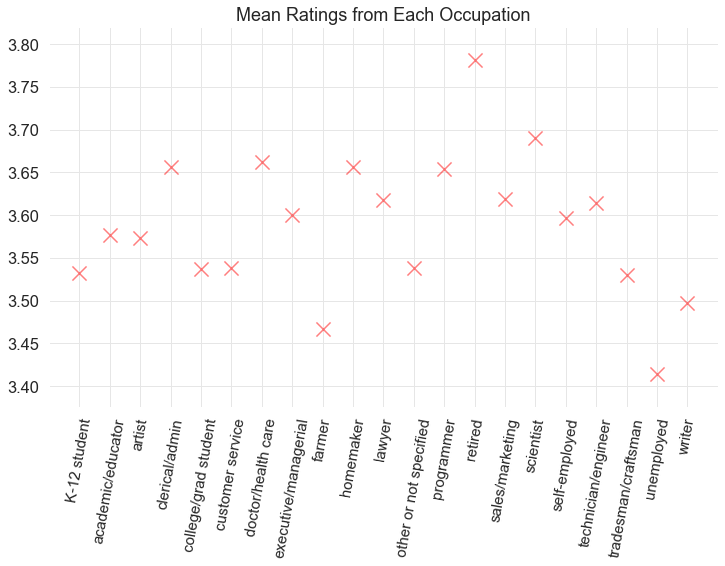

In [29]:
# Computing the mean ratings for each occupation using groupby method
mean_ratings_from_each_occupation = lens_data.groupby("occupation").mean()["rating"]

# Saving name of the occupation and it's respective mean ratings into the variables
occupations = mean_ratings_from_each_occupation.index
mean_ratings = mean_ratings_from_each_occupation.values

# Scatter plot to show the mean ratings for each category
plt.title("Mean Ratings from Each Occupation")
plt.scatter(x=occupations, y=mean_ratings, c='red', s=200, alpha=0.5, marker = "x")
plt.xticks(rotation=80, fontsize = 15)

# To show the plot
plt.show()

## Release Year Analysis

In [ ]:
# # Number of movies released in each year
# no_of_movies_in_each_year = lens_data[["movie_title", "movie_release_year"]].groupby("movie_release_year").size()

# year_counts = lens_data[["movie_title", "movie_release_year"]].groupby("movie_release_year").size()

# fig, ax = plt.subplots(figsize=(13, 8)) 
# ax.plot(year_counts.index, year_counts.values)
# ax.xaxis.set_major_locator(plt.MaxNLocator(10)) # changes the number of xticks we see
# plt.title("Count of moveis releases for each year", fontsize=25)
# plt.xlabel("Year", fontsize= 20)
# plt.ylabel("Number of Movies Released", fontsize=20)
# plt.show()

# Recommendation System

<img src = "recmSys_Flow_Chart.png" />

**Recommender System**:
<br/>
Recommender system encompasses the tasks in devolping a learning algorithm that can automatically recomment products or service to human being or any agent. Two main types of recommender system are Content based and Collaborative filtering.

**Content-Based**:
<br/>
This is one kind of learning algorithm that uses features of items to recommend other items similar to what the user likes, based on their previous actions or explicit feedback.

**TF-IDF**:
<br/>
We will be making use of the concept of TF-IDF. TF-IDF defines importance of a term by taking into consideration the importance of that term in a single document, and scaling it by its importance across all documents. 

**TF-IDF Formula**:
<img src = "TFIDF_FORMULA.png" />

In [31]:
# Break up the big genre string into a string array
movies_data['genres'] = movies_data['genres'].str.split('|')
# Convert genres to string value
movies_data['genres'] = movies_data['genres'].fillna("").astype('str')

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies_data['genres'])
tfidf_matrix.shape

(3883, 127)

**Cosine Similarity:**
<br>
It is defines as the angle between two vectors in a multi-dimensional space. The above step, where we use the TfidVectorizer to get the matrix of vectors. Now the angle between these vectors should be measured to know how similar the vectors are. Smaller the angle higher the smilarity.   

**Cosine Similarity Formula**
<img src = "Cosine_similarity.png" />
<img src = "cosine_similarity_2.png" />

Inner product of both vectors are taken and these vectors are scaled. This gives cosine between vectors

In [190]:
# Import time module to compare two executions 
import time

# cosine_similarity: computes the cosine similarity and gives a pairwise cosine similarity matrix
from sklearn.metrics.pairwise import cosine_similarity
start_time_for_cosine_similarity = time.time()
cosine_similarity1 = cosine_similarity(tfidf_matrix)
end_time_for_cosine_similarity = time.time()
time_elapsed_for_cosine_similarity = (end_time_for_cosine_similarity-start_time_for_cosine_similarity)

# Displaying the results
print("Array of cosine similarities using method 1: ")
print(cosine_sim1[:4, :4])
print()
print("Time elapsed when cosine similarity is used:", round(time_elapsed_for_cosine_similarity,4), "seconds")

Array of cosine similarities using method 1: 
[[1.         0.14193614 0.09010857 0.1056164 ]
 [0.14193614 1.         0.         0.        ]
 [0.09010857 0.         1.         0.1719888 ]
 [0.1056164  0.         0.1719888  1.        ]]

Time elapsed when cosine similarity is used: 0.1267 seconds


In [191]:
# Second approach to find the similarity 
from sklearn.metrics.pairwise import linear_kernel
start_time_for_linear_kernel = time.time()
cosine_similarity2 = linear_kernel(tfidf_matrix, tfidf_matrix)
end_time_for_linear_kernel = time.time()
time_elapsed_for_linear_kernel = (end_time_for_linear_kernel-start_time_for_linear_kernel)

# Displaying the results
print("Array of cosine similarities using method 2: ")
print(cosine_sim2[:4, :4])
print()
print("Time elapsed when cosine similarity is used:", round(time_elapsed_for_linear_kernel,4), "seconds")

Array of cosine similarities using method 2: 
[[1.         0.14193614 0.09010857 0.1056164 ]
 [0.14193614 1.         0.         0.        ]
 [0.09010857 0.         1.         0.1719888 ]
 [0.1056164  0.         0.1719888  1.        ]]

Time elapsed when cosine similarity is used: 0.1177 seconds


**Observation:** Above two methods demonstrate 2 methods for computing the cosine simlarity between the vectors, both give the same results. There is small analysis made here to find the time elapsed by both processes to finish. During most observations, the time taken by the linear_kernel (2nd method) was found to be faster than the cosine_similarity (1st method)   

In [184]:
# I now have a pairwise cosine similarity matrix for all the movies in the dataset.
# Top 10 similar movies based on the cosine similarity score to be displayed

# 1d array created using pandas Series with movie titles
titles_of_movies = movies_data['title']
series_of_movies_as_indices = pd.Series(data = movies_data.index, index = titles_of_movies)

# Funtion to get the top 10 similar movies based on the scores generated 
def recommendation_based_on_genre(input_movie_title):
    movie_index = series_of_movies_as_indices[input_movie_title]
    # Scores of similar moveis are enumerates and listed for sorting 
    sorted_scores_similar_movies = sorted(list(enumerate(cosine_similarity2[movie_index])),
                                          reverse=True,
                                          key=lambda x: x[1])
    # Top 10 moveis sorted based on genre similarity scores 
    top_ten_similar_movies = sorted_scores_similar_movies[1:11]
    # List comprehension for containing  indices of the top 10 similar movies
    movie_indices = [i[0] for i in top_ten_similar_movies]
    # Returns the name of movies from the titles column for the matching index
    return titles_of_movies.iloc[movie_indices]

In [185]:
print("Top 10 similar movies recommended based of the user's choice: ")
recommendation_based_on_genre("Jumanji (1995)")

Top 10 similar movies recommended based of the user's choice: 


55                         Kids of the Round Table (1995)
59                     Indian in the Cupboard, The (1995)
124                     NeverEnding Story III, The (1994)
996                       Escape to Witch Mountain (1975)
1898                                     Labyrinth (1986)
1936                                  Goonies, The (1985)
1974            Darby O'Gill and the Little People (1959)
2092                        NeverEnding Story, The (1984)
2093    NeverEnding Story II: The Next Chapter, The (1...
2330                        Santa Claus: The Movie (1985)
Name: title, dtype: object

**Collaborative Filtering**

<img src = "Content_based_ani..gif" />
